# **Car Price Prediction**

# Importing Libraries

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [4]:
carData = pd.read_csv('/content/car data.csv')

# EDA and Preprocessing

In [5]:
carData.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
carData.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [18]:
carData.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [20]:
carData.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


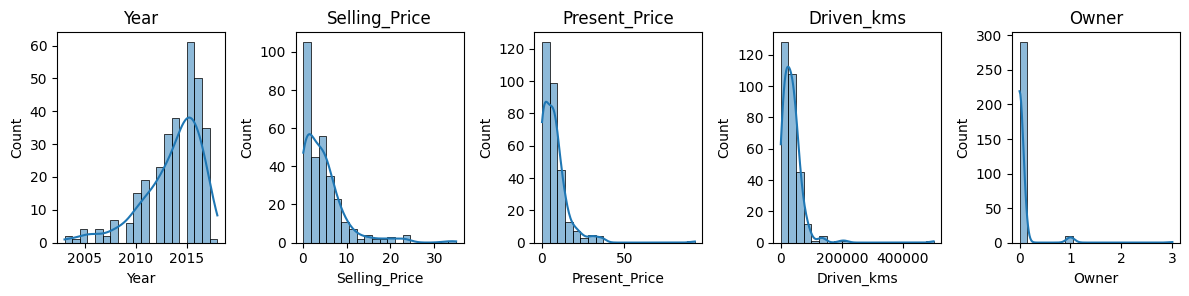

In [41]:
numerical_features = ['Year',	'Selling_Price',	'Present_Price',	'Driven_kms','Owner']
categorical_features = ['Fuel_Type',	'Selling_type',	'Transmission','Car_Name']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=carData[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

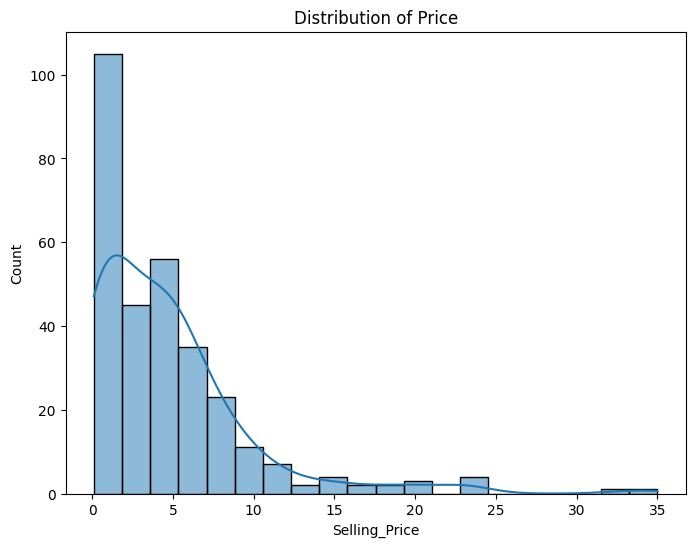

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(data=carData['Selling_Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

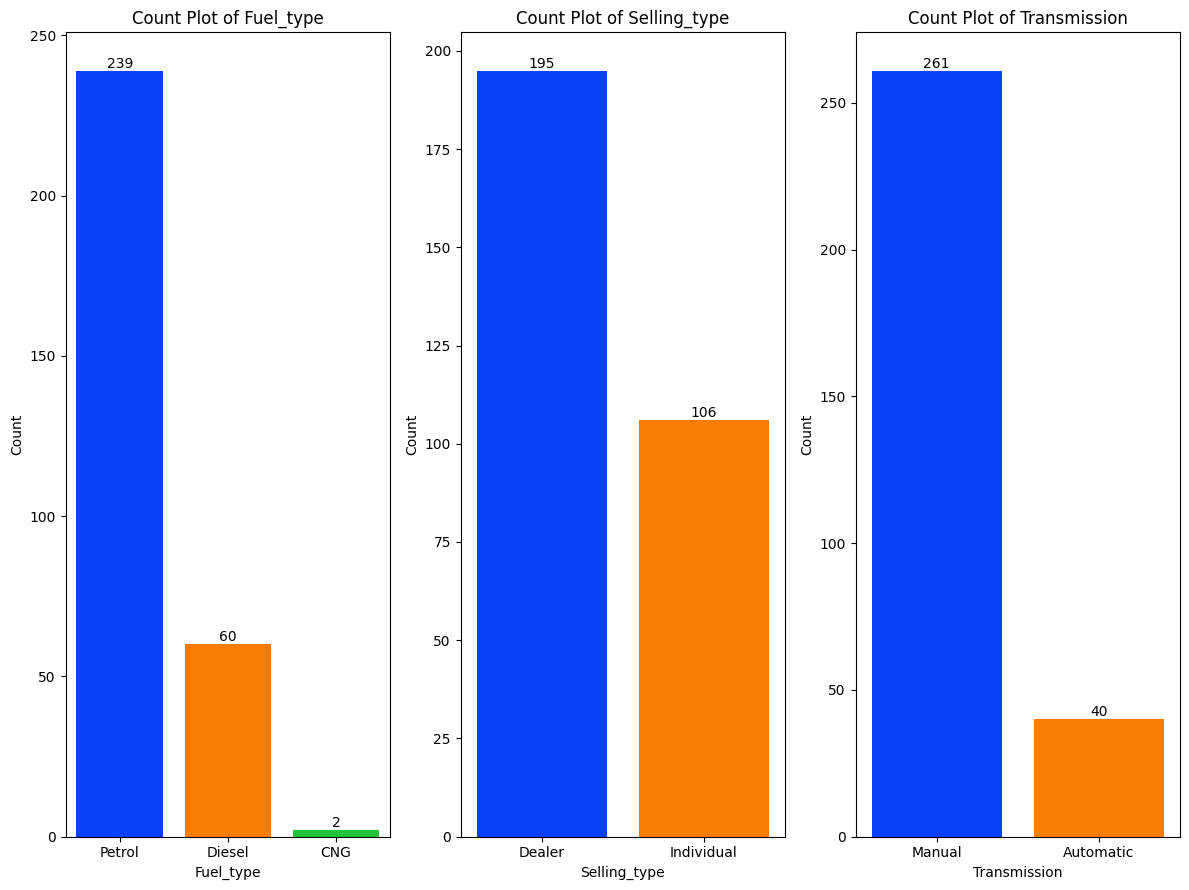

In [44]:
categorical_columns = ['Fuel_Type',	'Selling_type',	'Transmission']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 9))
axes = axes.ravel()
for i, column in enumerate(categorical_columns):
    sns.countplot(x=carData[column], data=carData, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

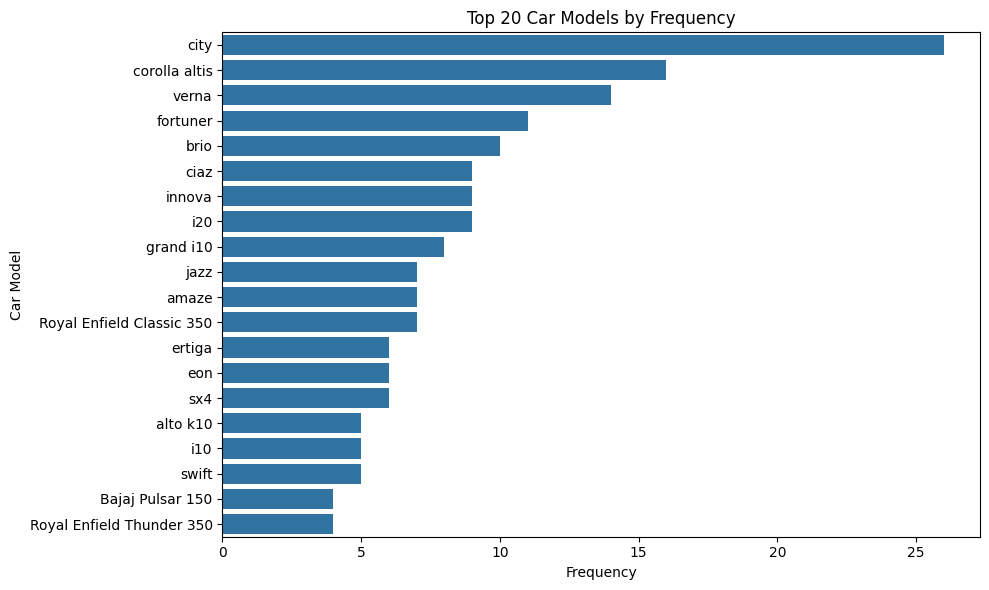

In [45]:
n = 20
top_car_models = carData['Car_Name'].value_counts().head(n)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

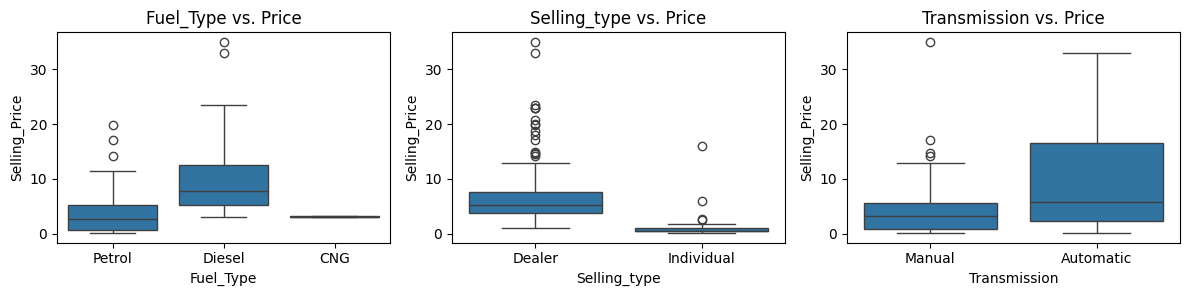

In [48]:
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=carData, x=feature, y='Selling_Price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

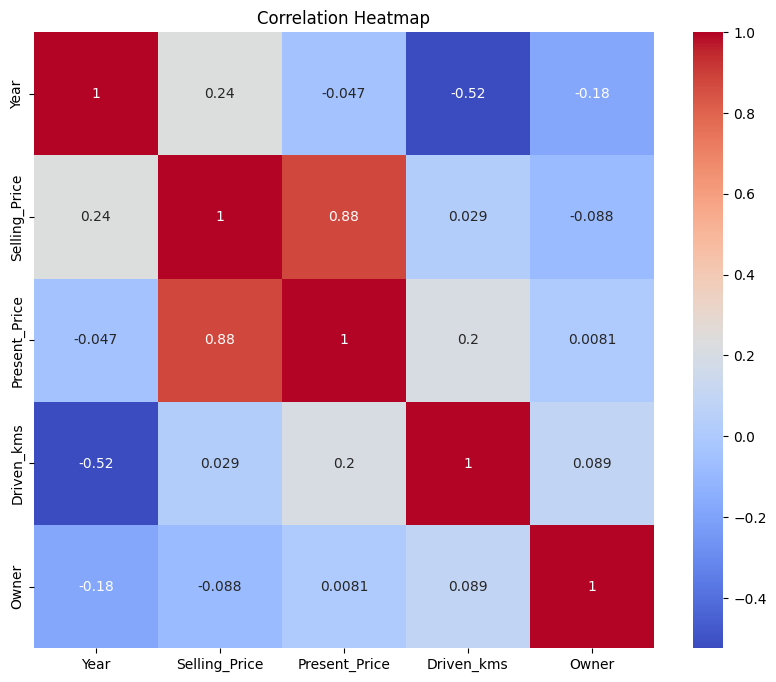

In [50]:
correlation_matrix = carData[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Model Tranning and Prediction

In [7]:
X = car_data[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = car_data['Selling_Price']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
missing_features = set(X_train.columns) - set(X_test.columns)
for feature in missing_features:
    X_test[feature] = 0

In [8]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.81
R-squared: 0.96


In [10]:
print("Training Feature Names:")
print(X_train.columns)
print("\nTesting Feature Names:")
print(X_test.columns)

Training Feature Names:
Index(['Year', 'Present_Price', 'Driven_kms', 'Owner', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Dealer',
       'Selling_type_Individual', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

Testing Feature Names:
Index(['Year', 'Present_Price', 'Driven_kms', 'Owner', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Dealer',
       'Selling_type_Individual', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')


In [51]:
custom_data = pd.DataFrame({
    'Year': [2018],
    'Present_Price': [1000000.0],
    'Driven_kms': [10000],
    'Owner': [0],
    'Fuel_Type_CNG': [1],
    'Fuel_Type_Diesel': [0],
    'Fuel_Type_Petrol': [1],
    'Selling_type_Dealer': [1],
    'Selling_type_Individual': [1],
    'Transmission_Automatic': [0],
    'Transmission_Manual': [0]
})
custom_prediction = rf_regressor.predict(custom_data)
print(f"Predicted Selling Price for Custom Data: {custom_prediction[0]:.2f}")

Predicted Selling Price for Custom Data: 29.24
